# Car Price Prediction

## Content
This project has a dataset that contains the **car prices** for a Chinese automobile company Geely Auto.
Hence, using this dataset, I will predict the ***car price value*** for a particular car given the features of the car

In [364]:
pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [365]:
# import necessary libraries
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Reading Data

In [366]:
df = pd.read_csv('dataset/car_prices.csv')
display(df.head())
print()
display(df.info())

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwAaDOmX573WiRRnLFPT237,2812500,Petrol,Automatic,Toyota,Corolla,2004,Silver,Nigerian Used,251732.0,1800.0,Registered,Registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ByZ3NlPy2x0arAIyrKazClUS,5000000,Petrol,Automatic,Acura,MDX,2007,Green,Foreign Used,224589.0,3700.0,Imported,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
2,2zG6Mh3kwyoTvWoeKHkV1oFH,7592000,Petrol,Automatic,Acura,TL,2012,White,Foreign Used,111334.0,3500.0,Imported,Imported,Sedan,SH-AWD Automatic Tech Package,All Wheel,5.0,6.0,309.0,NaN
3,7APLHOPlI93qsYK0ST4D4wB2,9880000,Petrol,Automatic,Land Rover,Range Rover,2012,Gray,Nigerian Used,72682.0,4000.0,Registered,Imported,SUV,NaN,NaN,NaN,NaN,NaN,NaN
4,zIrIDPJLd46eRQf9JFacc0e,4160000,Petrol,Automatic,Ford,Edge,2013,Gray,Nigerian Used,92118.0,3500.0,Registered,Registered,SUV,NaN,NaN,NaN,NaN,NaN,Lagos



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_id               3722 non-null   object 
 1   price                3722 non-null   int64  
 2   fuel type            3721 non-null   object 
 3   gear type            3720 non-null   object 
 4   Make                 3722 non-null   object 
 5   Model                3722 non-null   object 
 6   Year of manufacture  3722 non-null   int64  
 7   Colour               3717 non-null   object 
 8   Condition            3722 non-null   object 
 9   Mileage              3663 non-null   float64
 10  Engine Size          3661 non-null   float64
 11  Selling Condition    3722 non-null   object 
 12  Bought Condition     3722 non-null   object 
 13  car                  1767 non-null   object 
 14  Trim                 879 non-null    object 
 15  Drivetrain           838 non-null    

None

We can see that we have some null entries hence we need a proper data cleaning session. We will eliminate the null values and convert all string datatype to lowercase.

### Data cleaning:  Null value removal and string conversion
fill all null values with 0 and convert all object datatype contents to lower strings

In [367]:
# list all strings 
list(df.dtypes[df.dtypes == 'object'].index)

['car_id',
 'fuel type',
 'gear type',
 'Make',
 'Model',
 'Colour',
 'Condition',
 'Selling Condition',
 'Bought Condition',
 'car',
 'Trim',
 'Drivetrain',
 'Registered city']

In [368]:
# remove all NaN


In [369]:
#convert all strings to lower case and remove spacing
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
       df[col] = df[col].str.lower().str.replace(' ', '_')

In [370]:
df.sample()

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
3125,steotdhisjdc6e5pxmq4xtjo,2500000,petrol,automatic,ford,edge,2008,blue,nigerian_used,228188.0,3500.0,registered,imported,suv,NaN,NaN,NaN,NaN,NaN,abuja


In [371]:
df.head()

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwaadomx573wirrnlfpt237,2812500,petrol,automatic,toyota,corolla,2004,silver,nigerian_used,251732.0,1800.0,registered,registered,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,byz3nlpy2x0araiyrkazclus,5000000,petrol,automatic,acura,mdx,2007,green,foreign_used,224589.0,3700.0,imported,imported,suv,NaN,NaN,NaN,NaN,NaN,NaN
2,2zg6mh3kwyotvwoekhkv1ofh,7592000,petrol,automatic,acura,tl,2012,white,foreign_used,111334.0,3500.0,imported,imported,sedan,sh-awd_automatic_tech_package,all_wheel,5.0,6.0,309.0,NaN
3,7aplhopli93qsyk0st4d4wb2,9880000,petrol,automatic,land_rover,range_rover,2012,gray,nigerian_used,72682.0,4000.0,registered,imported,suv,NaN,NaN,NaN,NaN,NaN,NaN
4,ziridpjld46erqf9jfacc0e,4160000,petrol,automatic,ford,edge,2013,gray,nigerian_used,92118.0,3500.0,registered,registered,suv,NaN,NaN,NaN,NaN,NaN,lagos


### EDA : Finiding Insights

In [372]:
df.shape # data rows and columns number

(3722, 20)

In [373]:
# find all null values
df.isnull().sum()

car_id                    0
price                     0
fuel type                 1
gear type                 2
Make                      0
Model                     0
Year of manufacture       0
Colour                    5
Condition                 0
Mileage                  59
Engine Size              61
Selling Condition         0
Bought Condition          0
car                    1955
Trim                   2843
Drivetrain             2884
Seats                  2934
Number of Cylinders    2896
Horse Power            2967
Registered city        1821
dtype: int64

In [374]:
# we add 'none' if any string feature is missing and 0 for any integer value.
# df = df.fillna(0)
replace_values = {'object': 'none', 'float64': 0}
for col in df.columns:
    df[col] = df[col].fillna(replace_values.get(str(df[col].dtype), 'none'))

In [375]:
df.head()

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city
0,icwaadomx573wirrnlfpt237,2812500,petrol,automatic,toyota,corolla,2004,silver,nigerian_used,251732.0,1800.0,registered,registered,none,none,none,0.0,0.0,0.0,none
1,byz3nlpy2x0araiyrkazclus,5000000,petrol,automatic,acura,mdx,2007,green,foreign_used,224589.0,3700.0,imported,imported,suv,none,none,0.0,0.0,0.0,none
2,2zg6mh3kwyotvwoekhkv1ofh,7592000,petrol,automatic,acura,tl,2012,white,foreign_used,111334.0,3500.0,imported,imported,sedan,sh-awd_automatic_tech_package,all_wheel,5.0,6.0,309.0,none
3,7aplhopli93qsyk0st4d4wb2,9880000,petrol,automatic,land_rover,range_rover,2012,gray,nigerian_used,72682.0,4000.0,registered,imported,suv,none,none,0.0,0.0,0.0,none
4,ziridpjld46erqf9jfacc0e,4160000,petrol,automatic,ford,edge,2013,gray,nigerian_used,92118.0,3500.0,registered,registered,suv,none,none,0.0,0.0,0.0,lagos


In [376]:
df.isnull().sum()

car_id                 0
price                  0
fuel type              0
gear type              0
Make                   0
Model                  0
Year of manufacture    0
Colour                 0
Condition              0
Mileage                0
Engine Size            0
Selling Condition      0
Bought Condition       0
car                    0
Trim                   0
Drivetrain             0
Seats                  0
Number of Cylinders    0
Horse Power            0
Registered city        0
dtype: int64

In [377]:
df.describe()

,price,Year of manufacture,Mileage,Engine Size,Seats,Number of Cylinders,Horse Power
count,3.722000e+03,3722.000000,3.722000e+03,3.722000e+03,3722.000000,3722.000000,3722.000000
mean,4.514644e+06,2008.145889,1.918933e+05,1.089902e+04,1.119022,1.144546,42.361096
std,4.297012e+06,4.205670,1.405905e+05,1.082238e+05,2.190735,2.216951,89.852955
min,5.500000e+05,1979.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,2.310000e+06,2005.000000,1.153562e+05,2.000000e+03,0.000000,0.000000,0.000000
50%,3.360000e+06,2008.000000,1.740380e+05,2.500000e+03,0.000000,0.000000,0.000000
75%,5.036250e+06,2011.000000,2.429852e+05,3.500000e+03,0.000000,0.000000,0.000000
max,6.240000e+07,2022.000000,2.456318e+06,3.500000e+06,8.000000,8.000000,585.000000


In [378]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:7]) # looks for all unique values
    print(df[col].nunique())
    print()

car_id
['icwaadomx573wirrnlfpt237' 'byz3nlpy2x0araiyrkazclus'
 '2zg6mh3kwyotvwoekhkv1ofh' '7aplhopli93qsyk0st4d4wb2'
 'ziridpjld46erqf9jfacc0e' 'cxcddlfyhktgnpxvlsqsibwz'
 '3lh1di00msjudnahwxorn1l2']
3120

price
[ 2812500  5000000  7592000  9880000  4160000  5250000 16640000]
516

fuel type
['petrol' 'diesel' 'hybrid' 'electric' 'none']
5

gear type
['automatic' 'manual' 'cvt' 'none']
4

Make
['toyota' 'acura' 'land_rover' 'ford' 'lexus' 'mercedes-benz' 'lancia']
50

Model
['corolla' 'mdx' 'tl' 'range_rover' 'edge' 'zdx' 'gx']
325

Year of manufacture
[2004 2007 2012 2013 2010 2011 2015]
31

Colour
['silver' 'green' 'white' 'gray' 'red' 'gold' 'black']
19

Condition
['nigerian_used' 'foreign_used' 'brand_new']
3

Mileage
[251732. 224589. 111334.  72682.  92118.  93991. 122987.]
3032

Engine Size
[1800. 3700. 3500. 4000. 4800. 3000. 2500.]
70

Selling Condition
['registered' 'imported' 'brand_new']
3

Bought Condition
['registered' 'imported' 'brand_new']
3

car
['none' 'suv' 'sedan' 't

We can identify some variables we can convert to categorical variables

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'Year of manufacture'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'Engine Size'}>,
        <Axes: title={'center': 'Seats'}>,
        <Axes: title={'center': 'Number of Cylinders'}>],
       [<Axes: title={'center': 'Horse Power'}>, <Axes: >, <Axes: >]],
      dtype=object)

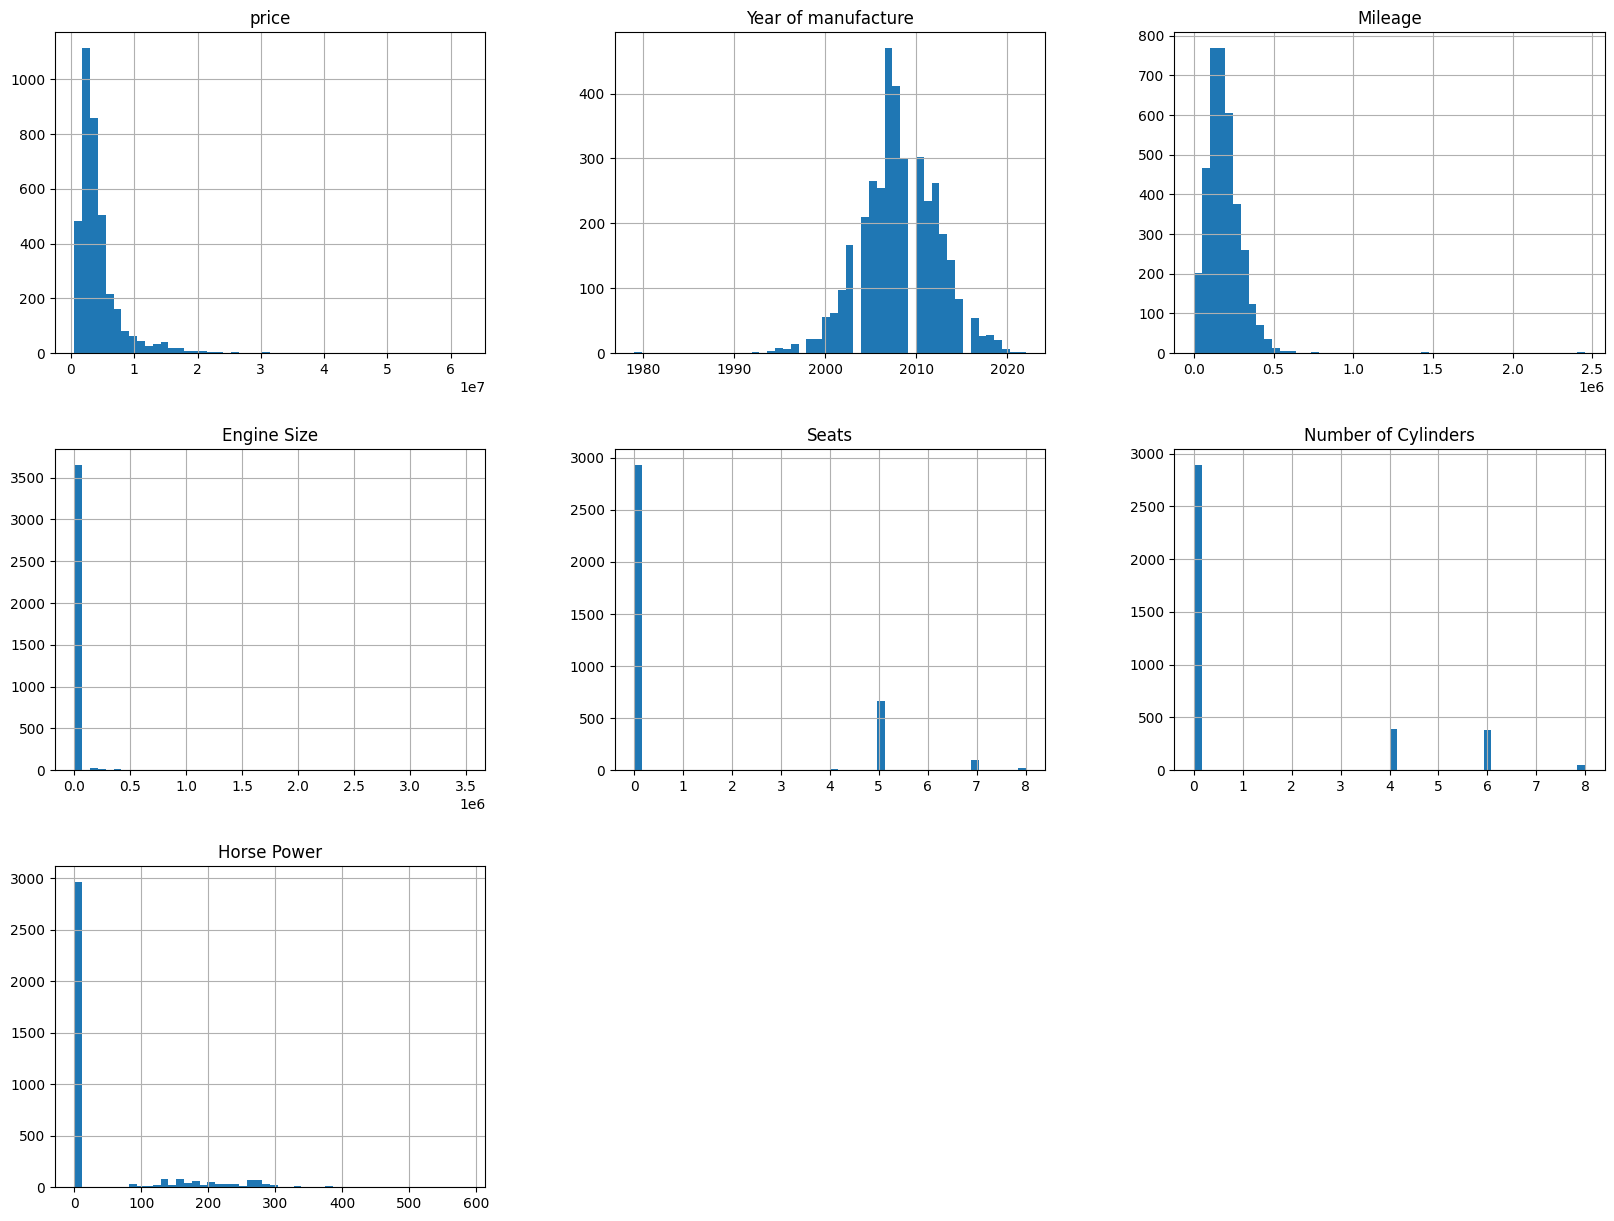

In [379]:
df.hist(bins=50, figsize=(20,15))

**Now let's study the target variable**

<Axes: xlabel='price', ylabel='Count'>

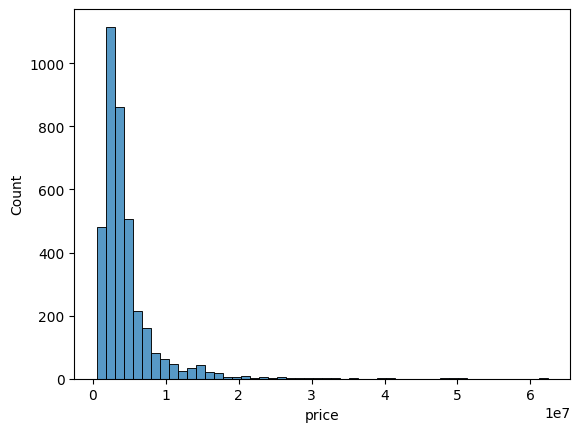

In [380]:
sns.histplot(df.price, bins=50)

There is some long tail distribution and this could cause some slight problems so we solve that. We need to normalize the distribution.

In [381]:
price_logs =  np.log1p(df.price)

In [382]:
df['price_logs'] = price_logs

In [383]:
df.head()

,car_id,price,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,...,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city,price_logs
0,icwaadomx573wirrnlfpt237,2812500,petrol,automatic,toyota,corolla,2004,silver,nigerian_used,251732.0,...,registered,registered,none,none,none,0.0,0.0,0.0,none,14.849585
1,byz3nlpy2x0araiyrkazclus,5000000,petrol,automatic,acura,mdx,2007,green,foreign_used,224589.0,...,imported,imported,suv,none,none,0.0,0.0,0.0,none,15.424949
2,2zg6mh3kwyotvwoekhkv1ofh,7592000,petrol,automatic,acura,tl,2012,white,foreign_used,111334.0,...,imported,imported,sedan,sh-awd_automatic_tech_package,all_wheel,5.0,6.0,309.0,none,15.842606
3,7aplhopli93qsyk0st4d4wb2,9880000,petrol,automatic,land_rover,range_rover,2012,gray,nigerian_used,72682.0,...,registered,imported,suv,none,none,0.0,0.0,0.0,none,16.106023
4,ziridpjld46erqf9jfacc0e,4160000,petrol,automatic,ford,edge,2013,gray,nigerian_used,92118.0,...,registered,registered,suv,none,none,0.0,0.0,0.0,lagos,15.241026


In [384]:
del df['price']
del df['car_id']

In [385]:
df.head(1)

,fuel type,gear type,Make,Model,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,car,Trim,Drivetrain,Seats,Number of Cylinders,Horse Power,Registered city,price_logs
0,petrol,automatic,toyota,corolla,2004,silver,nigerian_used,251732.0,1800.0,registered,registered,none,none,none,0.0,0.0,0.0,none,14.849585


In [386]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [387]:
df.price_logs

0       14.849585
1       15.424949
2       15.842606
3       16.106023
4       15.241026
          ...    
3717    14.469917
3718    14.452088
3719    13.959612
3720    14.046623
3721    14.442518
Name: price_logs, Length: 3722, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

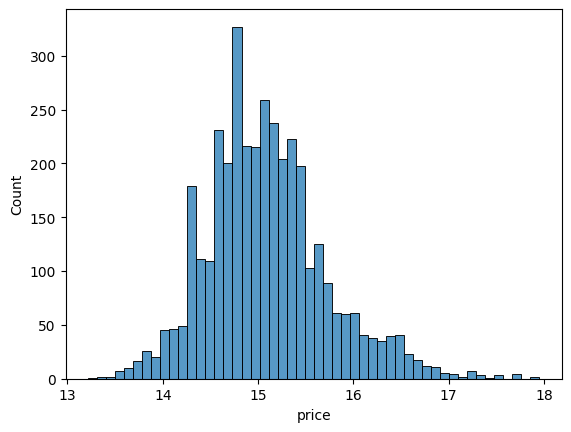

In [388]:
sns.histplot(price_logs, bins=50)

We can see a more normal distribution

In [389]:
df.head(1)

,fuel_type,gear_type,make,model,year_of_manufacture,colour,condition,mileage,engine_size,selling_condition,bought_condition,car,trim,drivetrain,seats,number_of_cylinders,horse_power,registered_city,price_logs
0,petrol,automatic,toyota,corolla,2004,silver,nigerian_used,251732.0,1800.0,registered,registered,none,none,none,0.0,0.0,0.0,none,14.849585


In [390]:
list(df.dtypes[df.dtypes == 'object'].index)

['fuel_type',
 'gear_type',
 'make',
 'model',
 'colour',
 'condition',
 'selling_condition',
 'bought_condition',
 'car',
 'trim',
 'drivetrain',
 'registered_city']

In [391]:
# split the categorical and numerical columns
categorical =list(df.select_dtypes('object').columns)
numerical = list(df.drop(['price_logs'], axis=1).select_dtypes('number').columns)

In [392]:
categorical

['fuel_type',
 'gear_type',
 'make',
 'model',
 'colour',
 'condition',
 'selling_condition',
 'bought_condition',
 'car',
 'trim',
 'drivetrain',
 'registered_city']

In [393]:
numerical

['year_of_manufacture',
 'mileage',
 'engine_size',
 'seats',
 'number_of_cylinders',
 'horse_power']

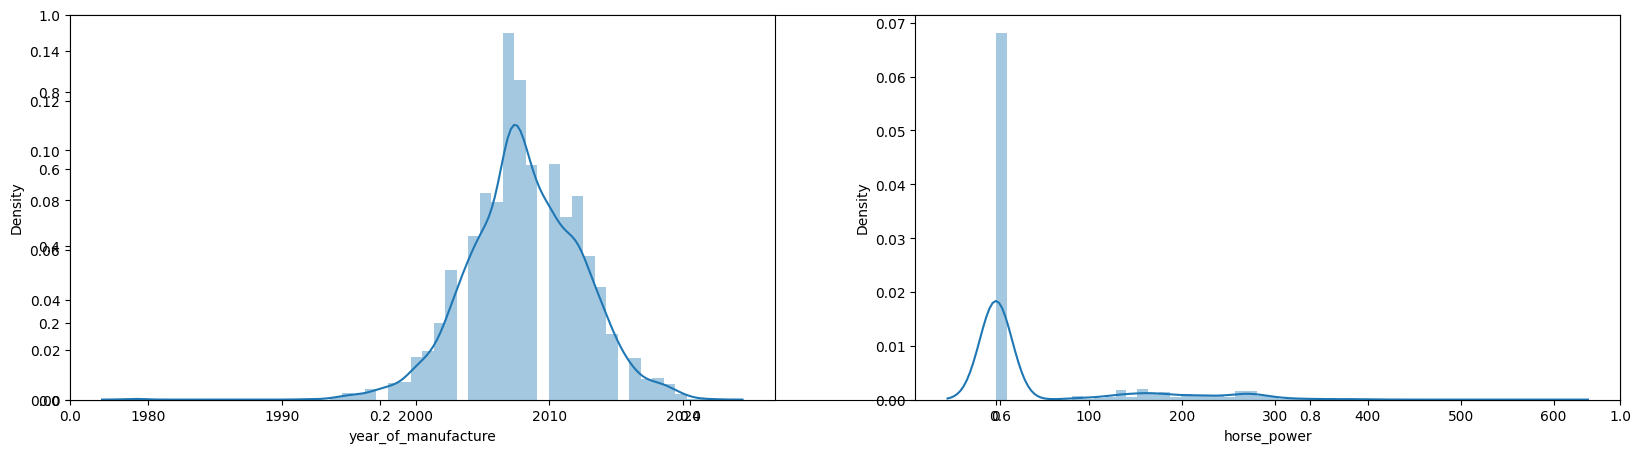

In [394]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['year_of_manufacture'])

plt.subplot(122)
sns.distplot(df['horse_power'])

plt.show();   

let's look at the correlation of numeric data

In [395]:
df[numerical].corr()

,year_of_manufacture,mileage,engine_size,seats,number_of_cylinders,horse_power
year_of_manufacture,1.000000,-0.293536,0.000296,0.012933,0.039561,0.073824
mileage,-0.293536,1.000000,0.012303,0.040785,0.037003,0.033737
engine_size,0.000296,0.012303,1.000000,-0.037686,-0.037511,-0.033855
seats,0.012933,0.040785,-0.037686,1.000000,0.913733,0.856950
number_of_cylinders,0.039561,0.037003,-0.037511,0.913733,1.000000,0.904202
horse_power,0.073824,0.033737,-0.033855,0.856950,0.904202,1.000000


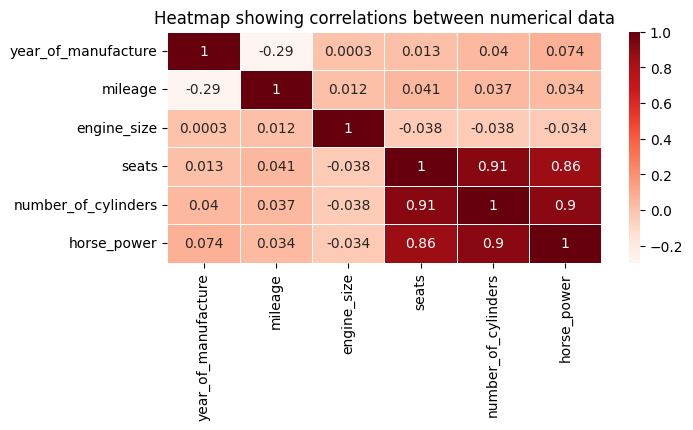

In [396]:
plt.figure(figsize=(7,3))  
sns.heatmap(df[numerical].corr(),annot=True,linewidths=.5, cmap="Reds")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

We can see that `seats` and `number_of_cylinders` are high. So is the same for `seats` and `horse_power`, and `horse_power` and `number_of_cylinders`

In [397]:
df[numerical[:5]].corr().unstack().sort_values(ascending = False)

year_of_manufacture  year_of_manufacture    1.000000
mileage              mileage                1.000000
seats                seats                  1.000000
engine_size          engine_size            1.000000
number_of_cylinders  number_of_cylinders    1.000000
                     seats                  0.913733
seats                number_of_cylinders    0.913733
                     mileage                0.040785
mileage              seats                  0.040785
number_of_cylinders  year_of_manufacture    0.039561
year_of_manufacture  number_of_cylinders    0.039561
mileage              number_of_cylinders    0.037003
number_of_cylinders  mileage                0.037003
seats                year_of_manufacture    0.012933
year_of_manufacture  seats                  0.012933
engine_size          mileage                0.012303
mileage              engine_size            0.012303
engine_size          year_of_manufacture    0.000296
year_of_manufacture  engine_size            0.

from above now we can see that `seats` and `number_of_cylinders` are really closely related

Now we look at the relation of the **numerical data** and the **target variables**

In [398]:
df[numerical].corrwith(df.price_logs).abs().sort_values(ascending = False)

year_of_manufacture    0.686062
mileage                0.219073
horse_power            0.116048
number_of_cylinders    0.071638
seats                  0.036358
engine_size            0.003206
dtype: float64

We can see that the `year_of_manufacture` as a great effect on the price of the car

We have to test our categorical features with the target variable

In [399]:
def mutual_info_price_log_score(series):
    return mutual_info_score(series, df.price_logs)

In [400]:
df[categorical].head()

,fuel_type,gear_type,make,model,colour,condition,selling_condition,bought_condition,car,trim,drivetrain,registered_city
0,petrol,automatic,toyota,corolla,silver,nigerian_used,registered,registered,none,none,none,none
1,petrol,automatic,acura,mdx,green,foreign_used,imported,imported,suv,none,none,none
2,petrol,automatic,acura,tl,white,foreign_used,imported,imported,sedan,sh-awd_automatic_tech_package,all_wheel,none
3,petrol,automatic,land_rover,range_rover,gray,nigerian_used,registered,imported,suv,none,none,none
4,petrol,automatic,ford,edge,gray,nigerian_used,registered,registered,suv,none,none,lagos


In [401]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [402]:
mutual_info = df[categorical].apply(mutual_info_price_log_score)
mutual_info.sort_values(ascending=False)

model                2.091691
trim                 1.015212
make                 0.799212
colour               0.553092
registered_city      0.465818
car                  0.383396
drivetrain           0.228285
bought_condition     0.220590
condition            0.205990
selling_condition    0.205990
gear_type            0.096633
fuel_type            0.036334
dtype: float64

We can see that the car `model` and car `trim` categorical variables have a strong effect on the price of the car.

In the context of vehicles, "trim" refers to the level of equipment, features, and options that a specific model of a vehicle comes with. It essentially represents different configurations or versions of the same model, each offering a varying set of features, amenities, and styling options.

For example, let's consider a popular car model like the Toyota Camry. The Camry may come in multiple trims, such as the base model, LE, SE, XLE, and XSE. Each trim level may offer different features such as engine size, interior materials, technology package, safety features, and exterior styling elements.

### Data Separation: Setting up the validation framework

I am gonna split it into three datasets (train, val, and test) - training, validation and test datasets I will use scikit-learn for this step

In [403]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=43)

In [404]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=43)

In [405]:
# sanity check
(len(df_train) / len(df)), (len(df_val) / len(df)), (len(df_val) / len(df))

(0.599677592692101, 0.2001612036539495, 0.2001612036539495)

In [406]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [407]:
df.head()

,fuel_type,gear_type,make,model,year_of_manufacture,colour,condition,mileage,engine_size,selling_condition,bought_condition,car,trim,drivetrain,seats,number_of_cylinders,horse_power,registered_city,price_logs
0,petrol,automatic,toyota,corolla,2004,silver,nigerian_used,251732.0,1800.0,registered,registered,none,none,none,0.0,0.0,0.0,none,14.849585
1,petrol,automatic,acura,mdx,2007,green,foreign_used,224589.0,3700.0,imported,imported,suv,none,none,0.0,0.0,0.0,none,15.424949
2,petrol,automatic,acura,tl,2012,white,foreign_used,111334.0,3500.0,imported,imported,sedan,sh-awd_automatic_tech_package,all_wheel,5.0,6.0,309.0,none,15.842606
3,petrol,automatic,land_rover,range_rover,2012,gray,nigerian_used,72682.0,4000.0,registered,imported,suv,none,none,0.0,0.0,0.0,none,16.106023
4,petrol,automatic,ford,edge,2013,gray,nigerian_used,92118.0,3500.0,registered,registered,suv,none,none,0.0,0.0,0.0,lagos,15.241026


In [408]:
y_train = df_train.price_logs.values
y_val = df_val.price_logs.values
y_test = df_test.price_logs.values

In [409]:
# drop target column
df_train = df_train.drop('price_logs', axis=1)
df_val = df_val.drop('price_logs', axis=1)
df_test = df_test.drop('price_logs', axis=1)

In [410]:
# peek at the training dataset
df_train.head()

,fuel_type,gear_type,make,model,year_of_manufacture,colour,condition,mileage,engine_size,selling_condition,bought_condition,car,trim,drivetrain,seats,number_of_cylinders,horse_power,registered_city
0,petrol,automatic,lexus,rx,2000,gold,nigerian_used,231827.0,3000.0,registered,imported,suv,none,none,0.0,0.0,0.0,benin
1,petrol,manual,nissan,micra,2006,blue,nigerian_used,165414.0,1400.0,registered,imported,none,none,none,0.0,0.0,0.0,ondo
2,petrol,automatic,toyota,highlander,2005,gold,foreign_used,275897.0,3300.0,imported,imported,none,none,none,0.0,0.0,0.0,none
3,petrol,automatic,toyota,picnic,1996,blue,nigerian_used,364008.0,2000.0,registered,imported,none,none,none,0.0,0.0,0.0,lagos
4,petrol,automatic,mercedes-benz,c350,2009,black,nigerian_used,233944.0,3500.0,registered,imported,none,none,none,0.0,0.0,0.0,none


In [411]:
df_val.head()

,fuel_type,gear_type,make,model,year_of_manufacture,colour,condition,mileage,engine_size,selling_condition,bought_condition,car,trim,drivetrain,seats,number_of_cylinders,horse_power,registered_city
0,petrol,automatic,toyota,camry,2002,silver,nigerian_used,162154.0,2400.0,registered,imported,none,none,none,0.0,0.0,0.0,lagos
1,petrol,automatic,toyota,corolla,2011,black,nigerian_used,160113.0,1800.0,registered,imported,none,none,none,0.0,0.0,0.0,none
2,petrol,automatic,mercedes-benz,e350,2014,gray,nigerian_used,31963.0,3500.0,registered,registered,none,none,none,0.0,0.0,0.0,lagos
3,petrol,automatic,toyota,avalon,2006,blue,nigerian_used,100897.0,3500.0,registered,registered,none,none,none,0.0,0.0,0.0,rivers
4,hybrid,automatic,toyota,camry,2007,gold,nigerian_used,172800.0,2500.0,registered,registered,sedan,2.3_hybrid,front,5.0,0.0,158.0,none


In [412]:
df_test.head()

,fuel_type,gear_type,make,model,year_of_manufacture,colour,condition,mileage,engine_size,selling_condition,bought_condition,car,trim,drivetrain,seats,number_of_cylinders,horse_power,registered_city
0,petrol,automatic,audi,a7,2011,gray,nigerian_used,173919.0,3000.0,registered,imported,none,none,none,0.0,0.0,0.0,lagos
1,petrol,automatic,lexus,is,2007,white,foreign_used,198433.0,2500.0,imported,imported,none,none,none,0.0,0.0,0.0,none
2,petrol,automatic,honda,pilot,2011,brown,nigerian_used,301456.0,3500.0,registered,imported,suv,none,none,0.0,0.0,0.0,lagos
3,petrol,automatic,toyota,corolla,2010,black,nigerian_used,289735.0,1800.0,registered,registered,none,none,none,0.0,0.0,0.0,none
4,petrol,automatic,ford,edge,2016,black,nigerian_used,52184.0,3500.0,registered,brand_new,suv,none,none,0.0,0.0,0.0,lagos


In [413]:
y_train


array([14.39492953, 13.95961177, 15.55947954, ..., 14.12299599,
       15.47373883, 15.42334739])

### MORE EDA

In [414]:
numerical

['year_of_manufacture',
 'mileage',
 'engine_size',
 'seats',
 'number_of_cylinders',
 'horse_power']

<Axes: xlabel='fuel_type', ylabel='count'>

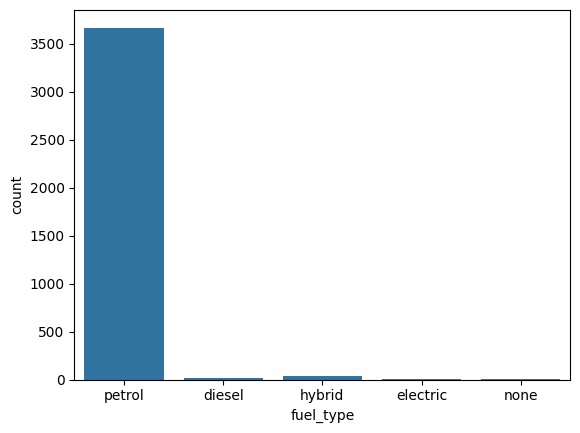

In [415]:
sns.countplot(x=df['fuel_type'])

<Axes: xlabel='gear_type', ylabel='price_logs'>

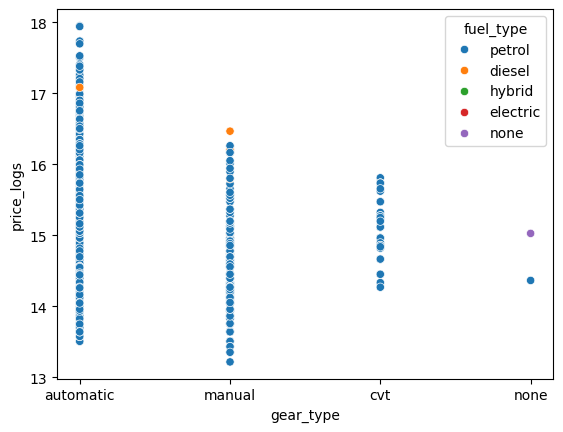

In [416]:
sns.scatterplot(x=df['gear_type'],y=df['price_logs'],hue=df['fuel_type'])

In [417]:
# perfrom linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [418]:
base = ['seats','number_of_cylinders']

Let's create a baseline model with our top features

In [419]:
df[base].sample(5)

,seats,number_of_cylinders
2131,0.0,0.0
2322,0.0,0.0
2799,5.0,6.0
1702,0.0,0.0
1636,0.0,0.0


In [420]:
# prepare the X_train & X_val
train_dict = df_train[base].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [4., 5.],
       [0., 0.]])

In [421]:
val_dict = df_val[base].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [422]:
y_train

array([14.39492953, 13.95961177, 15.55947954, ..., 14.12299599,
       15.47373883, 15.42334739])

In [423]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [424]:
model.intercept_ # bias term

15.066149730983451

In [425]:
w = model.coef_ # weights
w.round(3)

array([ 0.075, -0.059])

In [426]:
dict(zip(dv.get_feature_names_out(),w.round(3)))

{'number_of_cylinders': 0.075, 'seats': -0.059}

In [427]:
y_pred = model.predict(X_val)

In [428]:
score = np.sqrt(mean_squared_error(y_val, y_pred))

In [429]:
score

0.6195399823885789

With only **two** features we had 0.61 as the score. So we use this as a benchmark

In [430]:
for a in [0, 0.01, 0.1, 1, 10, 10000]:
    model = Ridge(alpha=a,random_state=43)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.62
0.01 0.62
0.1 0.62
1 0.62
10 0.62
10000 0.621


As we can see, using the regularization parameter does not really affect performance so we stick with non-reguralized model

In [431]:
features =  numerical + categorical
features

['year_of_manufacture',
 'mileage',
 'engine_size',
 'seats',
 'number_of_cylinders',
 'horse_power',
 'fuel_type',
 'gear_type',
 'make',
 'model',
 'colour',
 'condition',
 'selling_condition',
 'bought_condition',
 'car',
 'trim',
 'drivetrain',
 'registered_city']

In [432]:
train_dict = df_train[features].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_train

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.000e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.006e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.005e+03],
       ...,
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.001e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.012e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.007e+03]])

In [433]:
dv.get_feature_names_out()

array(['bought_condition=brand_new', 'bought_condition=imported',
       'bought_condition=registered', 'car=bus', 'car=convertible',
       'car=coupe', 'car=crossover', 'car=hatchback', 'car=minivan',
       'car=muv', 'car=none', 'car=pick-up_double_cabin', 'car=pickup',
       'car=saloon', 'car=sedan', 'car=station_wagon', 'car=suv',
       'car=truck', 'car=van', 'colour=beige', 'colour=black',
       'colour=blue', 'colour=brown', 'colour=burgandy', 'colour=gold',
       'colour=gray', 'colour=green', 'colour=ivory', 'colour=none',
       'colour=off_white', 'colour=orange', 'colour=pink',
       'colour=purple', 'colour=red', 'colour=silver', 'colour=teal',
       'colour=white', 'colour=yellow', 'condition=brand_new',
       'condition=foreign_used', 'condition=nigerian_used',
       'drivetrain=4x2', 'drivetrain=4x4', 'drivetrain=all_wheel',
       'drivetrain=front', 'drivetrain=front_wheel', 'drivetrain=none',
       'drivetrain=rear_wheel', 'engine_size', 'fuel_type=diesel

In [434]:
val_dict = df_val[features].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [435]:
l_model = LinearRegression()
l_model.fit(X_train, y_train)

LinearRegression()

In [436]:
l_model.intercept_ 

-176.18267888298243

In [437]:
w = l_model.coef_ # weights
w.round(3)

array([ 2.200e-02,  3.400e-02, -5.600e-02,  6.590e-01, -2.790e-01,
        1.700e-01,  4.700e-02,  5.200e-02, -5.600e-02, -2.080e-01,
        6.300e-02, -1.000e-02, -1.224e+00,  5.530e-01,  4.000e-03,
       -1.750e-01,  1.370e-01,  1.350e-01,  1.310e-01, -1.180e-01,
       -3.400e-02, -4.300e-02, -3.500e-02,  1.580e-01,  7.000e-03,
       -1.000e-02,  5.600e-02, -3.030e-01, -3.560e-01, -6.000e-03,
        2.490e-01,  1.840e-01,  2.700e-01, -4.000e-03, -1.100e-02,
        3.000e-03,  6.100e-02, -6.700e-02, -1.890e-01,  1.780e-01,
        1.100e-02, -1.610e-01,  6.900e-02,  2.400e-01,  1.470e-01,
        1.480e-01, -1.200e-02, -4.310e-01, -0.000e+00, -1.900e-02,
       -1.480e-01, -4.700e-02,  2.980e-01, -8.400e-02,  5.500e-02,
       -3.500e-02,  1.200e-02, -3.300e-02,  0.000e+00, -1.430e-01,
        2.310e-01,  8.680e-01,  1.800e-01,  4.290e-01, -4.800e-02,
       -2.230e-01, -7.430e-01, -6.700e-02,  6.200e-02,  2.200e-02,
       -1.860e-01, -2.200e-01,  1.540e-01, -5.700e-01, -1.260e

In [438]:
dict(zip(dv.get_feature_names_out(),w.round(3)))

{'bought_condition=brand_new': 0.022,
 'bought_condition=imported': 0.034,
 'bought_condition=registered': -0.056,
 'car=bus': 0.659,
 'car=convertible': -0.279,
 'car=coupe': 0.17,
 'car=crossover': 0.047,
 'car=hatchback': 0.052,
 'car=minivan': -0.056,
 'car=muv': -0.208,
 'car=none': 0.063,
 'car=pick-up_double_cabin': -0.01,
 'car=pickup': -1.224,
 'car=saloon': 0.553,
 'car=sedan': 0.004,
 'car=station_wagon': -0.175,
 'car=suv': 0.137,
 'car=truck': 0.135,
 'car=van': 0.131,
 'colour=beige': -0.118,
 'colour=black': -0.034,
 'colour=blue': -0.043,
 'colour=brown': -0.035,
 'colour=burgandy': 0.158,
 'colour=gold': 0.007,
 'colour=gray': -0.01,
 'colour=green': 0.056,
 'colour=ivory': -0.303,
 'colour=none': -0.356,
 'colour=off_white': -0.006,
 'colour=orange': 0.249,
 'colour=pink': 0.184,
 'colour=purple': 0.27,
 'colour=red': -0.004,
 'colour=silver': -0.011,
 'colour=teal': 0.003,
 'colour=white': 0.061,
 'colour=yellow': -0.067,
 'condition=brand_new': -0.189,
 'condition=f

In [439]:
y_pred = l_model.predict(X_val)

In [440]:
score = np.sqrt(mean_squared_error(y_val, y_pred))

In [441]:
score

0.28826210182807427

The above is done using a simple Linear Regression model. Now I want to try DecisionTreeRegressor and XGBoost models to build new models and see if I can achieve a lower rmse score

In [442]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [443]:
train_dicts = df_train.to_dict(orient='records')

In [444]:
train_dicts[0]

{'fuel_type': 'petrol',
 'gear_type': 'automatic',
 'make': 'lexus',
 'model': 'rx',
 'year_of_manufacture': 2000,
 'colour': 'gold',
 'condition': 'nigerian_used',
 'mileage': 231827.0,
 'engine_size': 3000.0,
 'selling_condition': 'registered',
 'bought_condition': 'imported',
 'car': 'suv',
 'trim': 'none',
 'drivetrain': 'none',
 'seats': 0.0,
 'number_of_cylinders': 0.0,
 'horse_power': 0.0,
 'registered_city': 'benin'}

In [445]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [446]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [447]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [448]:
y_pred = dt.predict(X_val)

In [449]:
score = np.sqrt(mean_squared_error(y_val, y_pred))

In [450]:
score

0.34722917956453003

Using the decision tree base model increased the score

In [451]:
# restrict depth search
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [452]:
y_pred = dt.predict(X_train)
score = np.sqrt(mean_squared_error(y_train, y_pred))
print('train:', score)

y_pred = dt.predict(X_val)
score = np.sqrt(mean_squared_error(y_val, y_pred))
print('val:', score)

train: 0.4225803741298819
val: 0.40904744117754316


In [453]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- year_of_manufacture <= 2009.50
|   |--- year_of_manufacture <= 2004.50
|   |   |--- selling_condition=registered <= 0.50
|   |   |   |--- value: [14.94]
|   |   |--- selling_condition=registered >  0.50
|   |   |   |--- value: [14.43]
|   |--- year_of_manufacture >  2004.50
|   |   |--- condition=nigerian_used <= 0.50
|   |   |   |--- value: [15.25]
|   |   |--- condition=nigerian_used >  0.50
|   |   |   |--- value: [14.85]
|--- year_of_manufacture >  2009.50
|   |--- year_of_manufacture <= 2014.50
|   |   |--- engine_size <= 2600.00
|   |   |   |--- value: [15.19]
|   |   |--- engine_size >  2600.00
|   |   |   |--- value: [15.71]
|   |--- year_of_manufacture >  2014.50
|   |   |--- engine_size <= 2600.00
|   |   |   |--- value: [15.92]
|   |   |--- engine_size >  2600.00
|   |   |   |--- value: [16.67]



Now, let's try different depth parameters.

In [454]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, 100, 500,1000,2000, None]

for depth in depths: 
    dt = DecisionTreeRegressor(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print('%4s -> %.3f' % (depth, score))

   1 -> 0.526
   2 -> 0.458
   3 -> 0.409
   4 -> 0.379
   5 -> 0.367
   6 -> 0.352
  10 -> 0.343
  15 -> 0.356
  20 -> 0.354
 100 -> 0.353
 500 -> 0.346
1000 -> 0.351
2000 -> 0.350
None -> 0.354


From the above we can see that the **best depth** parameter is **10**.

In [455]:
scores = []

for depth in [9, 10, 11]:
    for sample in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeRegressor(max_depth=depth)
        dt.fit(X_train, y_train)
    
        y_pred = dt.predict(X_val)
        score = np.sqrt(mean_squared_error(y_val, y_pred))
        
        scores.append((depth, sample, score))

In [456]:
columns = ['max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [457]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(3)

rmse              
max_depth            9      10     11
min_samples_leaf                     
1                 0.345  0.334  0.351
5                 0.349  0.340  0.351
10                0.342  0.334  0.350
15                0.342  0.337  0.351
20                0.346  0.338  0.350
100               0.345  0.333  0.358
200               0.345  0.333  0.351
500               0.343  0.333  0.353

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

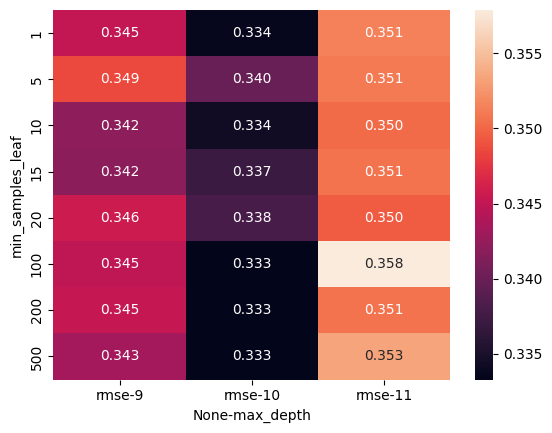

In [458]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f", color='red')

the best params are `max_depth=10,` and `min_sample_leaf=10`

In [459]:
dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=10)

In [460]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- year_of_manufacture <= 2009.50
|   |--- year_of_manufacture <= 2004.50
|   |   |--- selling_condition=imported <= 0.50
|   |   |   |--- engine_size <= 2450.00
|   |   |   |   |--- year_of_manufacture <= 2001.50
|   |   |   |   |   |--- registered_city=lagos <= 0.50
|   |   |   |   |   |   |--- mileage <= 216391.00
|   |   |   |   |   |   |   |--- value: [13.86]
|   |   |   |   |   |   |--- mileage >  216391.00
|   |   |   |   |   |   |   |--- mileage <= 329953.50
|   |   |   |   |   |   |   |   |--- value: [14.07]
|   |   |   |   |   |   |   |--- mileage >  329953.50
|   |   |   |   |   |   |   |   |--- value: [13.96]
|   |   |   |   |   |--- registered_city=lagos >  0.50
|   |   |   |   |   |   |--- value: [14.21]
|   |   |   |   |--- year_of_manufacture >  2001.50
|   |   |   |   |   |--- make=toyota <= 0.50
|   |   |   |   |   |   |--- mileage <= 230074.00
|   |   |   |   |   |   |   |--- year_of_manufacture <= 2003.50
|   |   |   |   |   |   |   |   |--- value: [14.16]
|   |  

In [461]:
y_pred = dt.predict(X_val)
score = np.sqrt(mean_squared_error(y_val, y_pred))
print('rmse score: ', score)

rmse score:  0.3448100553509928


So far the LinearRegression Model seems to be the best model with score of 0.288

## XGBoost

Here we gonna use another model called XGBoost to experiment with before we select the best model to go with

In [462]:
import xgboost as xgb

In [463]:
features = dv.get_feature_names_out()
features

array(['bought_condition=brand_new', 'bought_condition=imported',
       'bought_condition=registered', 'car=bus', 'car=convertible',
       'car=coupe', 'car=crossover', 'car=hatchback', 'car=minivan',
       'car=muv', 'car=none', 'car=pick-up_double_cabin', 'car=pickup',
       'car=saloon', 'car=sedan', 'car=station_wagon', 'car=suv',
       'car=truck', 'car=van', 'colour=beige', 'colour=black',
       'colour=blue', 'colour=brown', 'colour=burgandy', 'colour=gold',
       'colour=gray', 'colour=green', 'colour=ivory', 'colour=none',
       'colour=off_white', 'colour=orange', 'colour=pink',
       'colour=purple', 'colour=red', 'colour=silver', 'colour=teal',
       'colour=white', 'colour=yellow', 'condition=brand_new',
       'condition=foreign_used', 'condition=nigerian_used',
       'drivetrain=4x2', 'drivetrain=4x4', 'drivetrain=all_wheel',
       'drivetrain=front', 'drivetrain=front_wheel', 'drivetrain=none',
       'drivetrain=rear_wheel', 'engine_size', 'fuel_type=diesel

In [464]:
# we have to convert it to a form that can be processed by xgBoost
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [465]:
# basic parameters for an xgBoost model
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [466]:
y_pred = model.predict(dval)

In [467]:
score = np.sqrt(mean_squared_error(y_val, y_pred))

In [468]:
score

0.28183983275170604

On the default values, it has a lower score than the `LogisticRegression` Model which has a socre of **0.288**, now we have **0.281**

In [469]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [470]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [471]:
s = output.stdout

In [472]:
print(s[:200])

[0]	train-rmse:0.50564	val-rmse:0.50285
[5]	train-rmse:0.26288	val-rmse:0.30772
[10]	train-rmse:0.21292	val-rmse:0.27793
[15]	train-rmse:0.19508	val-rmse:0.27177
[20]	train-rmse:0.18584	val-rmse:0.266


In [473]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [474]:
df_score = parse_xgb_output(output)


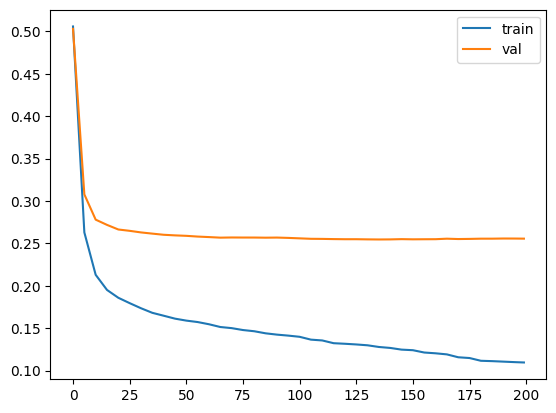

In [475]:
plt.plot(df_score.num_iter, df_score.train_rmse, label='train')
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.legend()


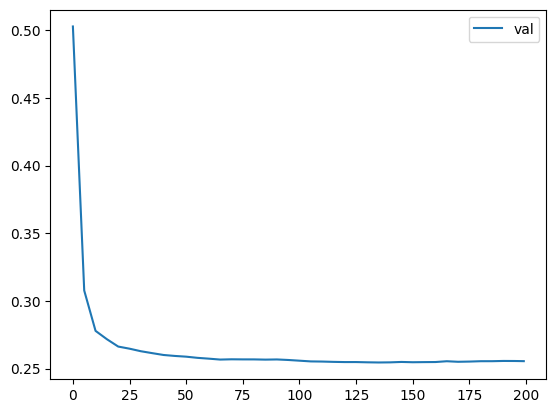

In [476]:
plt.plot(df_score.num_iter, df_score.val_rmse, label='val')
plt.legend()

In [477]:
scores = {}

We fine tune the learning rate `eta`

In [478]:
%%capture output
# search for best learning rate
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [479]:
key = 'eta={}'.format(xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [480]:
scores.keys()

dict_keys(['eta=0.1'])

In [481]:
# etas = ['eta=0.1', 'eta=0.3', 'eta=0.03', 'eta=0.05'] # the etas I used. future ref.
# for eta in etas:
#     df_score = scores[eta]
#     plt.plot(df_score.num_iter, df_score.val_rmse, label=eta)
# plt.ylim(0,4)
# plt.legend()

All learning rate have the same effect, we will stick with `0.3`

In [482]:
scores = {}

In [483]:

%%capture output
# search for best max_depth
xgb_params = {
    'eta': 0.3, 
    'max_depth': 3,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [484]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

In [485]:
scores

{'max_depth=3':     num_iter  train_rmse  val_rmse
 0          0     0.53943   0.52629
 1          5     0.35597   0.36675
 2         10     0.30547   0.32047
 3         15     0.28332   0.30292
 4         20     0.27015   0.29021
 5         25     0.25900   0.28294
 6         30     0.25263   0.27887
 7         35     0.24667   0.27426
 8         40     0.24265   0.27128
 9         45     0.23951   0.27053
 10        50     0.23645   0.26840
 11        55     0.23386   0.26788
 12        60     0.23018   0.26404
 13        65     0.22753   0.26355
 14        70     0.22556   0.26334
 15        75     0.22394   0.26188
 16        80     0.22066   0.26012
 17        85     0.21926   0.25929
 18        90     0.21807   0.25894
 19        95     0.21642   0.25887
 20       100     0.21449   0.25771
 21       105     0.21312   0.25692
 22       110     0.21213   0.25642
 23       115     0.21067   0.25464
 24       120     0.20960   0.25397
 25       125     0.20861   0.25409
 26       130

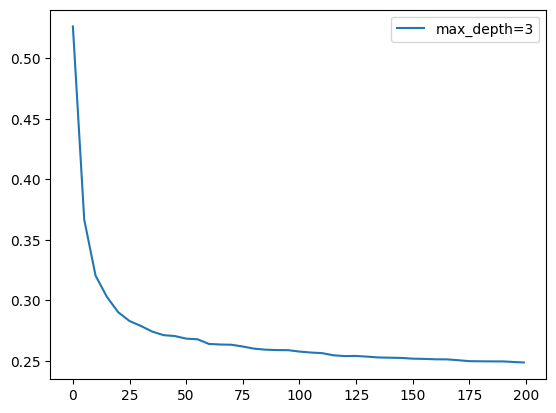

In [486]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=max_depth)
# plt.ylim(1, 4)
# plt.xlim(50, 125)

plt.legend()

from the above we can see that best max_depth is **6**

In [487]:
scores = {}

In [488]:
%%capture output
# search for best min_child_weight
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [489]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

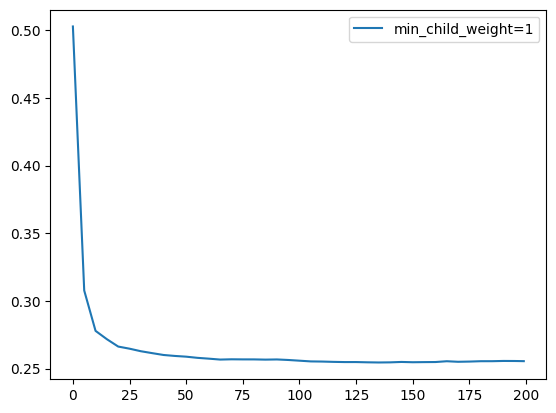

In [490]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_rmse, label=min_child_weight)

# plt.ylim(0.860, 0.8750)
plt.legend()

We can see the best `min_child_weight=4`

In [491]:
# the best model after tuning is
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 4,
    
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [492]:
y_pred = model.predict(dval)
score = np.sqrt(mean_squared_error(y_val, y_pred))
print('rmse score: ', score)

rmse score:  0.2460272994120215


The xgboost model is the better model.

## Using the Model

In [493]:
test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [494]:
selected_car = 50
car = test_dict[selected_car]
car

{'fuel_type': 'petrol',
 'gear_type': 'automatic',
 'make': 'toyota',
 'model': 'tundra',
 'colour': 'black',
 'condition': 'nigerian_used',
 'selling_condition': 'registered',
 'bought_condition': 'imported',
 'car': 'pickup',
 'trim': 'limited_crew_max_4x4',
 'drivetrain': 'all_wheel',
 'registered_city': 'none',
 'year_of_manufacture': 2007,
 'mileage': 114995.0,
 'engine_size': 5700.0,
 'seats': 5.0,
 'number_of_cylinders': 8.0,
 'horse_power': 275.0}

In [495]:
price_log = y_test[selected_car]
price_log

15.810211007243431

In [496]:
original_price = np.expm1(y_test[selected_car])
original_price

7349999.999999996

In [497]:
X_one_car = dv.transform([car])

In [498]:
dtest = xgb.DMatrix(X_one_car, feature_names=list(dv.get_feature_names_out()))

In [499]:
predicted_car_price_log = model.predict(dtest)[0]
predicted_car_price_log

15.737604

In [500]:
predicted_car_price = np.expm1(predicted_car_price_log)
predicted_car_price

6835252.5

In [504]:
# test for a range for users
def get_car_price_prediction(from_i, to_i):
    diffs = []
    if(from_i > to_i):
        print('first argument must be greater then the first')
        return
    for i in range(from_i, to_i + 1):
        print("================================")
        
        car = test_dict[i]
        X_one_car = dv.transform([car])
        
        dtest = xgb.DMatrix(X_one_car, feature_names=list(dv.get_feature_names_out()))
        predicted_car_price_log = model.predict(dtest)[0]
        predicted_car_price = np.expm1(predicted_car_price_log)
        
        print('The predicted car price is: ', predicted_car_price)
        
        original_price_log = y_test[i]
        original_price = np.expm1(original_price_log)
        print('The original car price is: ', original_price)
        
        print('We have a difference of: ', (predicted_car_price - original_price))
        diffs.append((predicted_car_price - original_price))
    return diffs

In [505]:
diffs = get_car_price_prediction(40,50)

The predicted car price is:  4094076.0
The original car price is:  4725000.000000004
We have a difference of:  -630924.0000000037
The predicted car price is:  4482621.0
The original car price is:  4680000.0
We have a difference of:  -197379.0
The predicted car price is:  5483999.5
The original car price is:  7819999.999999994
We have a difference of:  -2336000.4999999944
The predicted car price is:  2231025.5
The original car price is:  2912000.000000002
We have a difference of:  -680974.5000000019
The predicted car price is:  4942578.0
The original car price is:  3149999.9999999995
We have a difference of:  1792578.0000000005
The predicted car price is:  2558857.0
The original car price is:  2519999.9999999986
We have a difference of:  38857.0000000014
The predicted car price is:  4488387.0
The original car price is:  5985000.0
We have a difference of:  -1496613.0
The predicted car price is:  8482331.0
The original car price is:  7300000.000000004
We have a difference of:  1182330.999

In [506]:
np.mean(diffs)

-254667.45454545433